In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
path = "../data/final_tables/gefcom12/gefcom12.csv"

In [55]:
df = pd.read_csv(path)

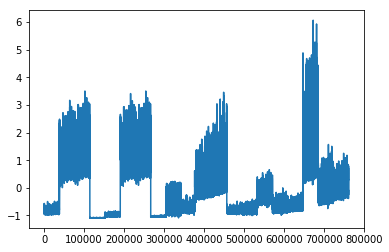

In [50]:
plt.plot(df["load_normalized"])

In [51]:
# Group by 'zoneid' and calculate mean and std for each group, then normalize within the group
df['mean_demand_per_zone'] = df.groupby('zone_id')['load'].transform('mean')
df['std_demand_per_zone'] = df.groupby('zone_id')['load'].transform('std')
# Apply normalization formula for each zone
df['load_normalized'] = (df['load'] - df['mean_demand_per_zone']) / df['std_demand_per_zone']

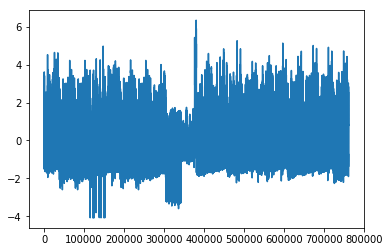

In [52]:
plt.plot(df["load_normalized"])

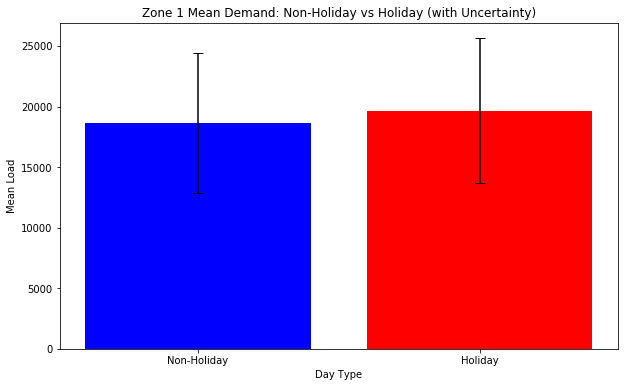

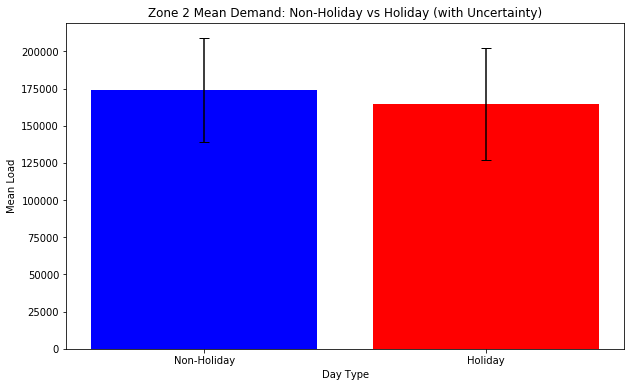

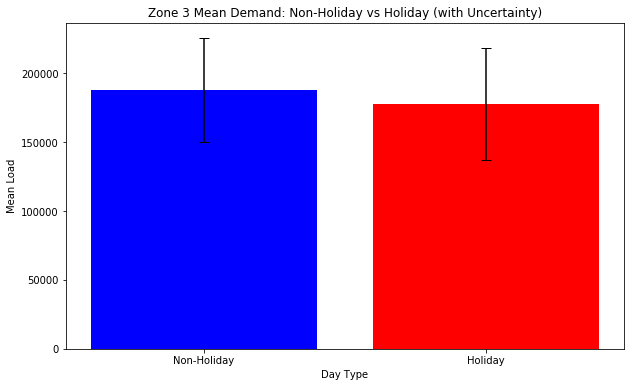

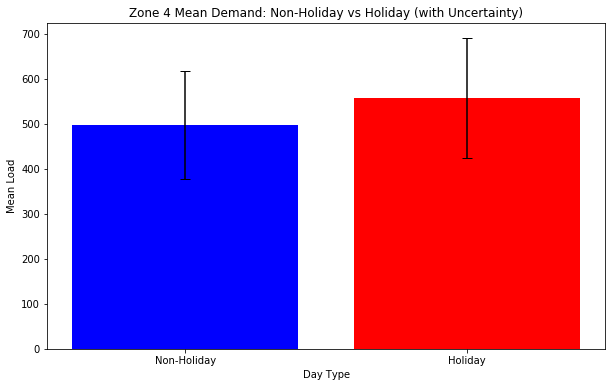

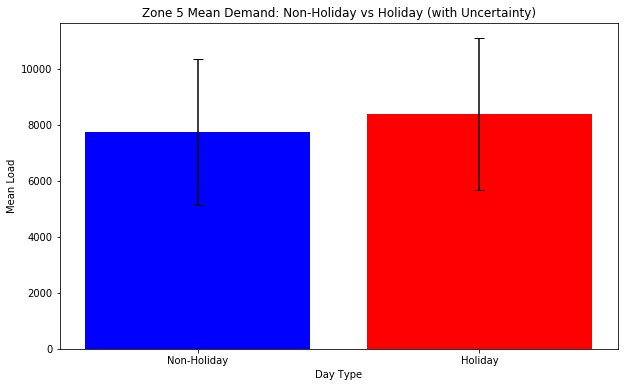

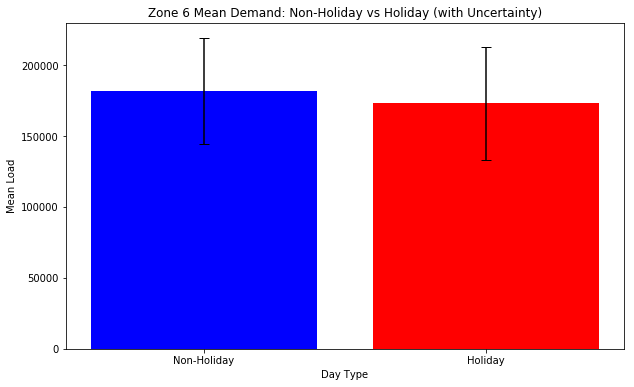

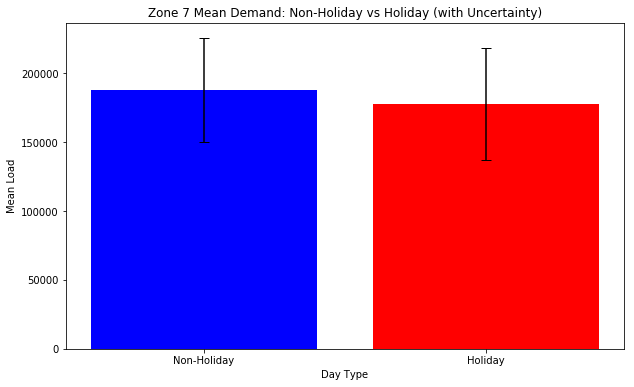

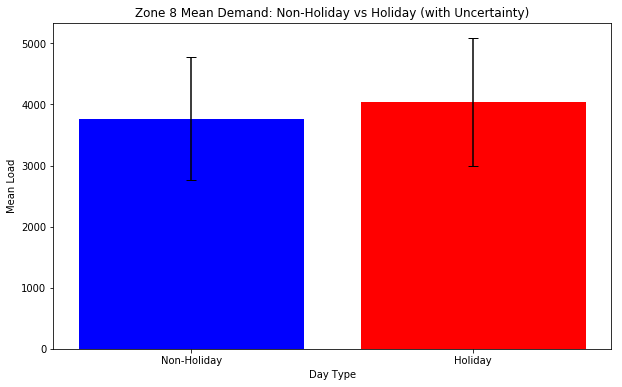

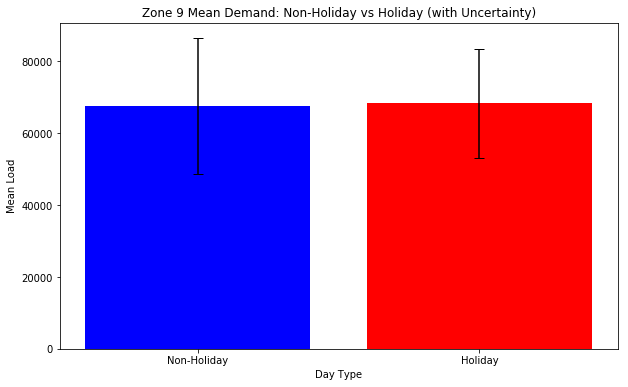

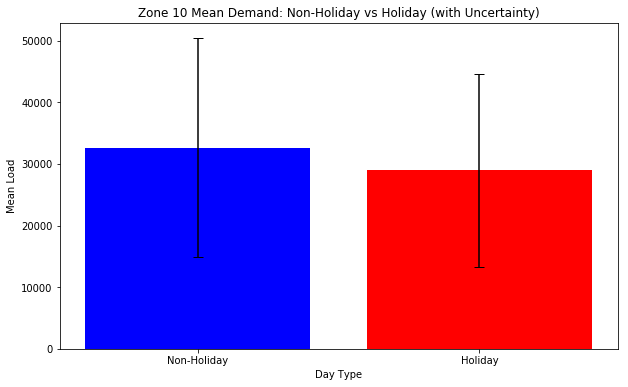

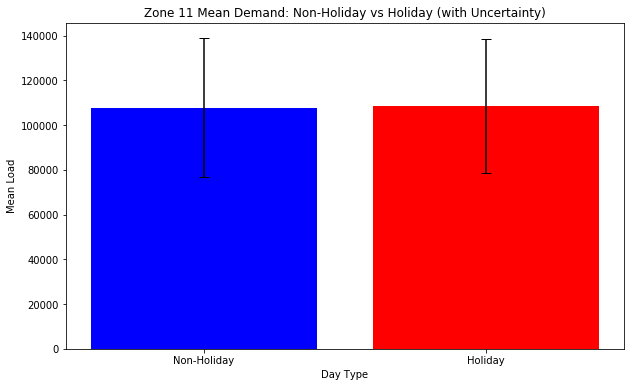

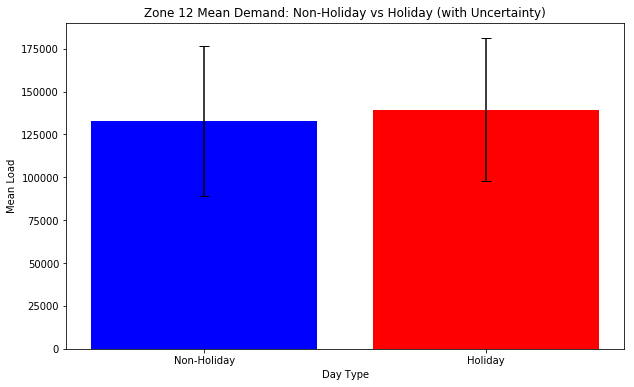

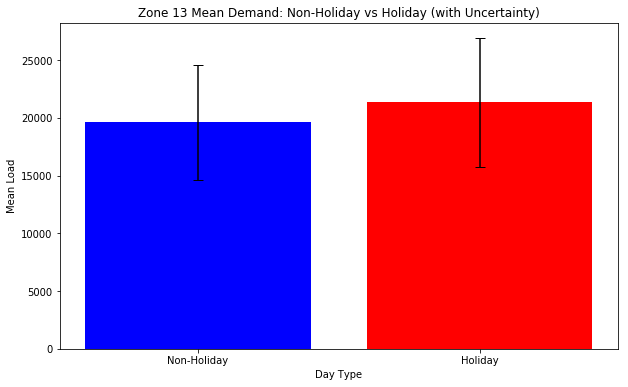

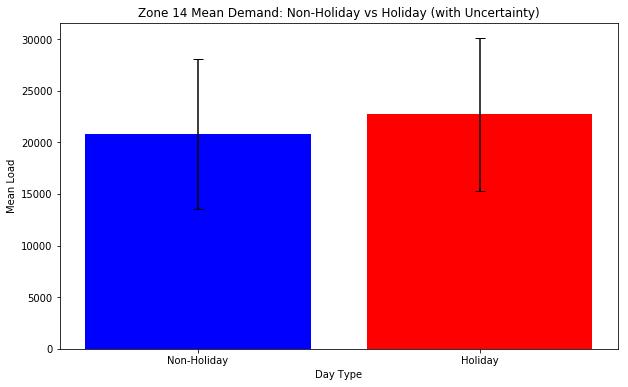

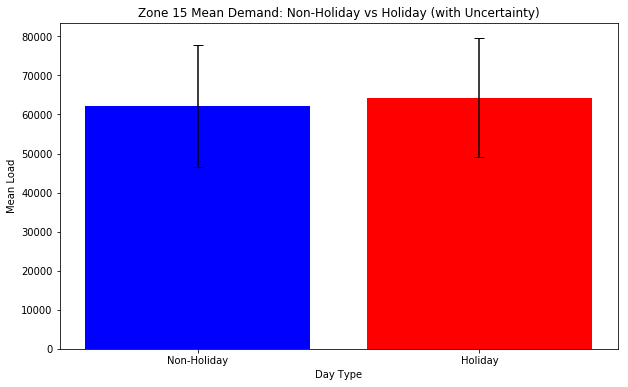

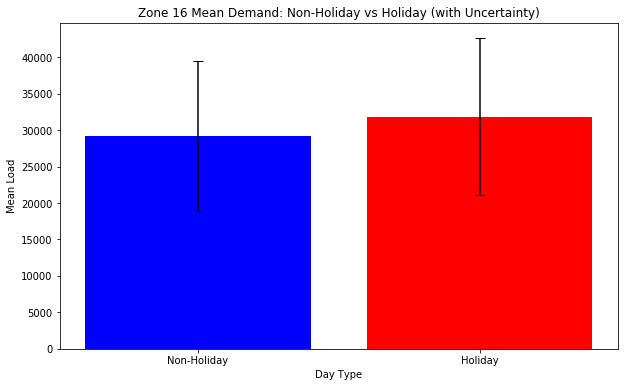

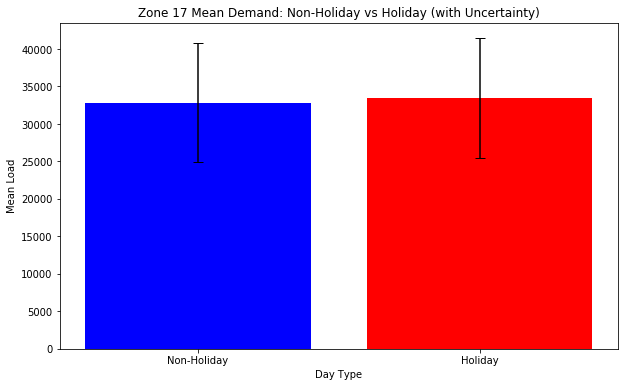

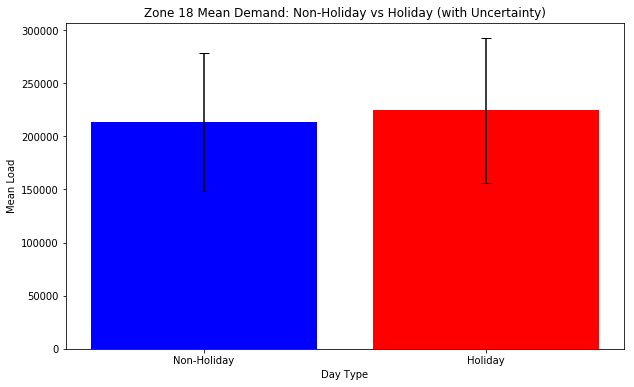

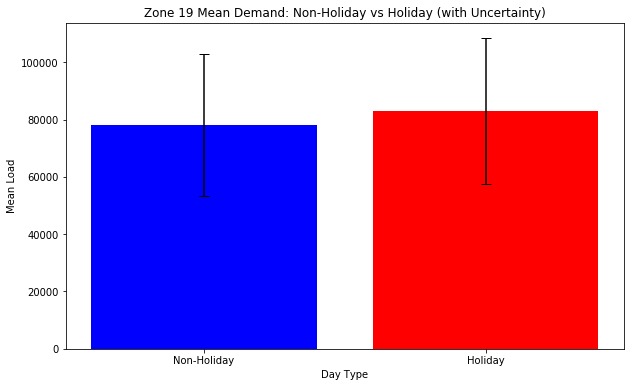

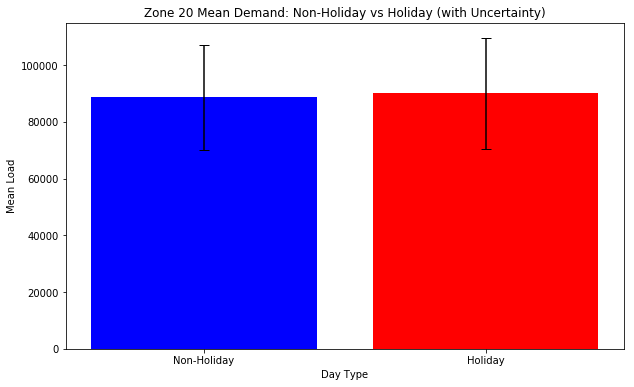

In [41]:
# Group by 'zoneid' and 'is_holiday', then calculate mean 'load'
grouped_data = df.groupby(['zone_id', 'is_holiday'])['load']
mean_demand = grouped_data.mean().reset_index(name='mean_load')
std_demand = grouped_data.std().reset_index(name='std_load')

# Merge mean and std dataframes
mean_std_demand = pd.merge(mean_demand, std_demand, on=['zone_id', 'is_holiday'])

# Plotting for each zone
for zone in mean_std_demand['zone_id'].unique():
    plt.figure(figsize=(10, 6))
    zone_data = mean_std_demand[mean_std_demand['zone_id'] == zone]
    
    # Error bars will represent the standard deviation of the demand
    plt.bar(zone_data['is_holiday'], zone_data['mean_load'], yerr=zone_data['std_load'], color=['blue', 'red'], capsize=5)
    
    plt.title(f'Zone {zone} Mean Demand: Non-Holiday vs Holiday (with Uncertainty)')
    plt.xticks(zone_data['is_holiday'], ['Non-Holiday', 'Holiday'])
    plt.ylabel('Mean Load')
    plt.xlabel('Day Type')
    plt.show()

In [30]:
df_filtered = df[(df['month'] == 12) & (df['day'] == 26)]


In [35]:
df_filtered

,index,zone_id,year,month,day,hour,load,date,is_holiday,load_normalized
16296,16800,1,2005,12,1,1,17926,2005-12-01,0,-0.853016
16297,16801,1,2005,12,1,2,18013,2005-12-01,0,-0.851864
16298,16802,1,2005,12,1,3,18064,2005-12-01,0,-0.851189
16299,16803,1,2005,12,1,4,18269,2005-12-01,0,-0.848475
16300,16804,1,2005,12,1,5,19243,2005-12-01,0,-0.835580
...,...,...,...,...,...,...,...,...,...,...
740197,769771,20,2005,12,24,20,95305,2005-12-24,0,0.171428
740198,769772,20,2005,12,24,21,96557,2005-12-24,0,0.188004
740199,769773,20,2005,12,24,22,97972,2005-12-24,0,0.206737
740200,769774,20,2005,12,24,23,96029,2005-12-24,0,0.181013


In [32]:
df_filtered[df['is_holiday']==0]

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,index,zone_id,year,month,day,hour,load,date,is_holiday,load_normalized


In [25]:
df_filtered

,index,zone_id,year,month,day,hour,load,date,is_holiday,load_normalized
8640,8640,1,2004,12,26,1,26303,2004-12-26,0,-0.742110
8641,8641,1,2004,12,26,2,26334,2004-12-26,0,-0.741700
8642,8642,1,2004,12,26,3,26627,2004-12-26,0,-0.737821
8643,8643,1,2004,12,26,4,26653,2004-12-26,0,-0.737476
8644,8644,1,2004,12,26,5,26850,2004-12-26,0,-0.734868
...,...,...,...,...,...,...,...,...,...,...
756925,787339,20,2007,12,26,20,120425,2007-12-26,0,0.503999
756926,787340,20,2007,12,26,21,129090,2007-12-26,0,0.618718
756927,787341,20,2007,12,26,22,124063,2007-12-26,0,0.552164
756928,787342,20,2007,12,26,23,115599,2007-12-26,0,0.440106
